In [10]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

import yfinance as yf
from ta_utils import *

In [33]:
def find_cointegrated_pairs(data: pd.DataFrame):
        n = data.shape[1]
        score_matrix = np.zeros((n, n))
        pvalue_matrix = np.ones((n, n))
        keys = data.keys()
        pairs = []
        for i in range(n):
            for j in range(i + 1, n):
                S1 = data[keys[i]]
                S2 = data[keys[j]]
                result = coint(S1, S2)
                score = result[0]
                pvalue = result[1]
                score_matrix[i, j] = score
                pvalue_matrix[i, j] = pvalue
                if pvalue < 0.05:
                    pairs.append((keys[i], keys[j]))
        pvalue_matrix_df = pd.DataFrame(pvalue_matrix, index=keys, columns=keys)
        return score_matrix, pvalue_matrix, pairs ,pvalue_matrix_df

In [34]:
tickers = ["AAPL","NVDA","MSFT","META","NFLX","GOOGL","ADBE"]

data = yf.download(
    stc,
    start="2020-01-01",
    end="2022-01-01"
)['Adj Close']

[*********************100%***********************]  44 of 44 completed


In [37]:
data

,AEFES.IS,AKBNK.IS,AKSEN.IS,ARCLK.IS,ASELS.IS,BIMAS.IS,DOHOL.IS,ECILC.IS,EKGYO.IS,ENJSA.IS,...,TCELL.IS,THYAO.IS,TKFEN.IS,TOASO.IS,TSKB.IS,TTKOM.IS,TUPRS.IS,VAKBN.IS,VESTL.IS,YKBNK.IS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,16.229280,7.007253,1.846251,17.649187,5.154026,39.852592,1.593998,3.404844,1.339674,5.476401,...,12.081920,14.830000,15.873039,18.848864,1.197030,5.673794,16.206749,5.56,10.158297,2.196680
2020-01-03,16.130919,6.818793,1.798667,17.749557,5.201793,40.764202,1.543925,3.341117,1.303709,5.295303,...,11.927026,14.270000,15.225817,18.609556,1.138159,5.574255,15.915533,5.37,10.441785,2.135661
2020-01-06,15.779638,6.604635,1.727291,17.900120,5.273443,41.005001,1.518889,3.268286,1.267745,5.164913,...,11.780732,13.570000,14.724226,18.412479,1.108724,5.413458,15.662305,5.16,10.394537,2.092077
2020-01-07,16.482204,6.673166,1.760600,17.632456,5.354646,41.314602,1.568962,3.313806,1.276736,5.266327,...,11.961445,13.540000,15.080194,18.708094,1.128348,5.459400,15.561011,5.25,10.819767,2.092077
2020-01-08,16.173073,6.818793,1.722533,17.431707,5.321210,41.658604,1.527234,3.268286,1.249763,5.295303,...,11.918418,13.500000,15.031653,18.877016,1.118536,5.512998,15.244474,5.36,10.756771,2.109511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,26.385500,6.878180,9.402555,48.113136,10.802993,61.296070,2.546469,7.100353,2.071342,10.658778,...,18.292273,20.780001,18.437412,65.968918,1.510000,9.120007,19.346807,3.83,24.680000,3.278630
2021-12-28,26.385500,6.465313,9.583374,46.827602,10.476230,60.049042,2.509830,6.899129,2.052681,10.400070,...,18.001919,20.480000,17.658119,63.832272,1.440000,8.730036,18.941637,3.69,23.799999,3.081554
2021-12-29,26.640961,6.456529,9.640475,47.451462,10.713875,61.104218,2.583109,6.985368,2.052681,10.632908,...,18.969765,21.080000,18.189457,66.236000,1.440000,8.889568,19.777300,3.74,24.280001,3.099470


<Axes: >

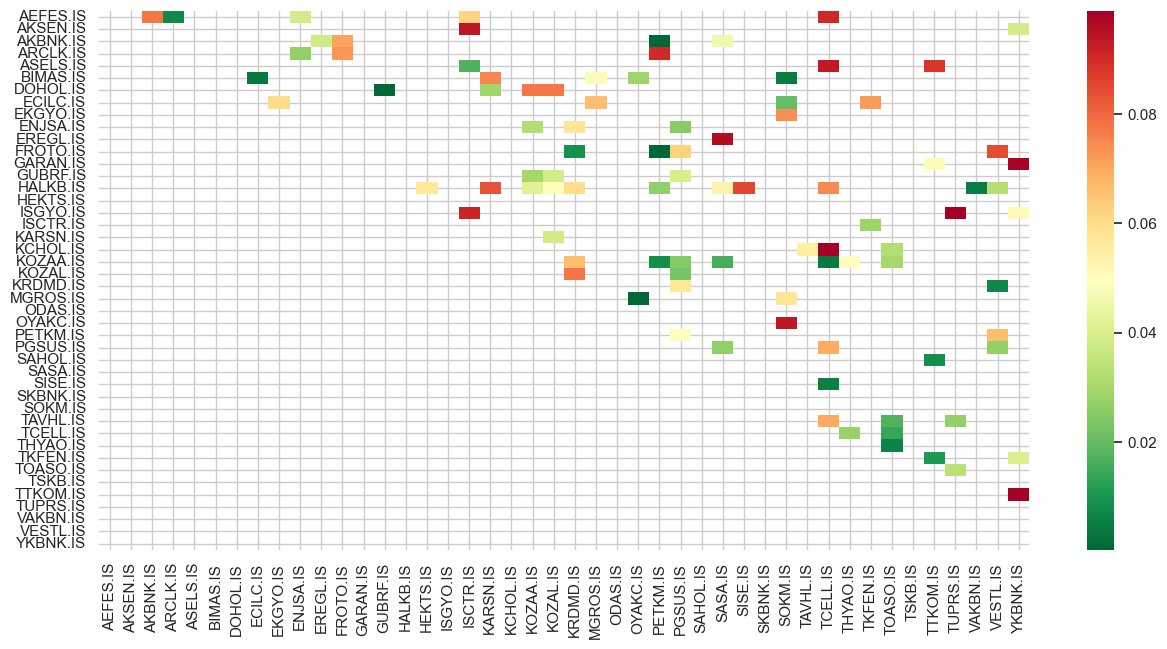

In [40]:
_, pvalues, pairs,df = find_cointegrated_pairs(data)
plt.figure(figsize=(15, 7))
sns.heatmap(
            pvalues,
            xticklabels=stc,
            yticklabels=stc,
            cmap="RdYlGn_r",
            mask=(pvalues >= 0.05),
        )

In [39]:
pairs

[('AEFES.IS', 'ARCLK.IS'),
 ('AEFES.IS', 'ENJSA.IS'),
 ('AKBNK.IS', 'YKBNK.IS'),
 ('AKSEN.IS', 'EREGL.IS'),
 ('AKSEN.IS', 'PETKM.IS'),
 ('AKSEN.IS', 'SASA.IS'),
 ('ARCLK.IS', 'ENJSA.IS'),
 ('ASELS.IS', 'ISGYO.IS'),
 ('BIMAS.IS', 'ECILC.IS'),
 ('BIMAS.IS', 'MGROS.IS'),
 ('BIMAS.IS', 'OYAKC.IS'),
 ('BIMAS.IS', 'SOKM.IS'),
 ('DOHOL.IS', 'GUBRF.IS'),
 ('DOHOL.IS', 'KARSN.IS'),
 ('ECILC.IS', 'SOKM.IS'),
 ('ENJSA.IS', 'KOZAA.IS'),
 ('ENJSA.IS', 'PGSUS.IS'),
 ('FROTO.IS', 'KRDMD.IS'),
 ('FROTO.IS', 'PETKM.IS'),
 ('GUBRF.IS', 'KOZAA.IS'),
 ('GUBRF.IS', 'KOZAL.IS'),
 ('GUBRF.IS', 'PGSUS.IS'),
 ('HALKB.IS', 'KOZAA.IS'),
 ('HALKB.IS', 'PETKM.IS'),
 ('HALKB.IS', 'VAKBN.IS'),
 ('HALKB.IS', 'VESTL.IS'),
 ('ISGYO.IS', 'TKFEN.IS'),
 ('KARSN.IS', 'KOZAL.IS'),
 ('KCHOL.IS', 'TOASO.IS'),
 ('KOZAA.IS', 'PETKM.IS'),
 ('KOZAA.IS', 'PGSUS.IS'),
 ('KOZAA.IS', 'SASA.IS'),
 ('KOZAA.IS', 'TCELL.IS'),
 ('KOZAA.IS', 'THYAO.IS'),
 ('KOZAA.IS', 'TOASO.IS'),
 ('KOZAL.IS', 'PGSUS.IS'),
 ('KRDMD.IS', 'VESTL.IS'),
 ('MG